In [9]:
import pandas as pd

# Загрузка данных
data = pd.read_csv('data/credit.csv')

# Вывод первых 5 строк таблицы
print(data.head())


        Income        Age         Loan  Loan to Income  Default
0  66155.92510  59.017015  8106.532131        0.122537        0
1  34415.15397  48.117153  6564.745018        0.190752        0
2  57317.17006  63.108049  8020.953296        0.139940        0
3  42709.53420  45.751972  6103.642260        0.142911        0
4  66952.68885  18.584336  8770.099235        0.130990        1


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Вывод первых 5 строк таблицы
print(data.head())


        Income        Age         Loan  Loan to Income  Default
0  66155.92510  59.017015  8106.532131        0.122537        0
1  34415.15397  48.117153  6564.745018        0.190752        0
2  57317.17006  63.108049  8020.953296        0.139940        0
3  42709.53420  45.751972  6103.642260        0.142911        0
4  66952.68885  18.584336  8770.099235        0.130990        1


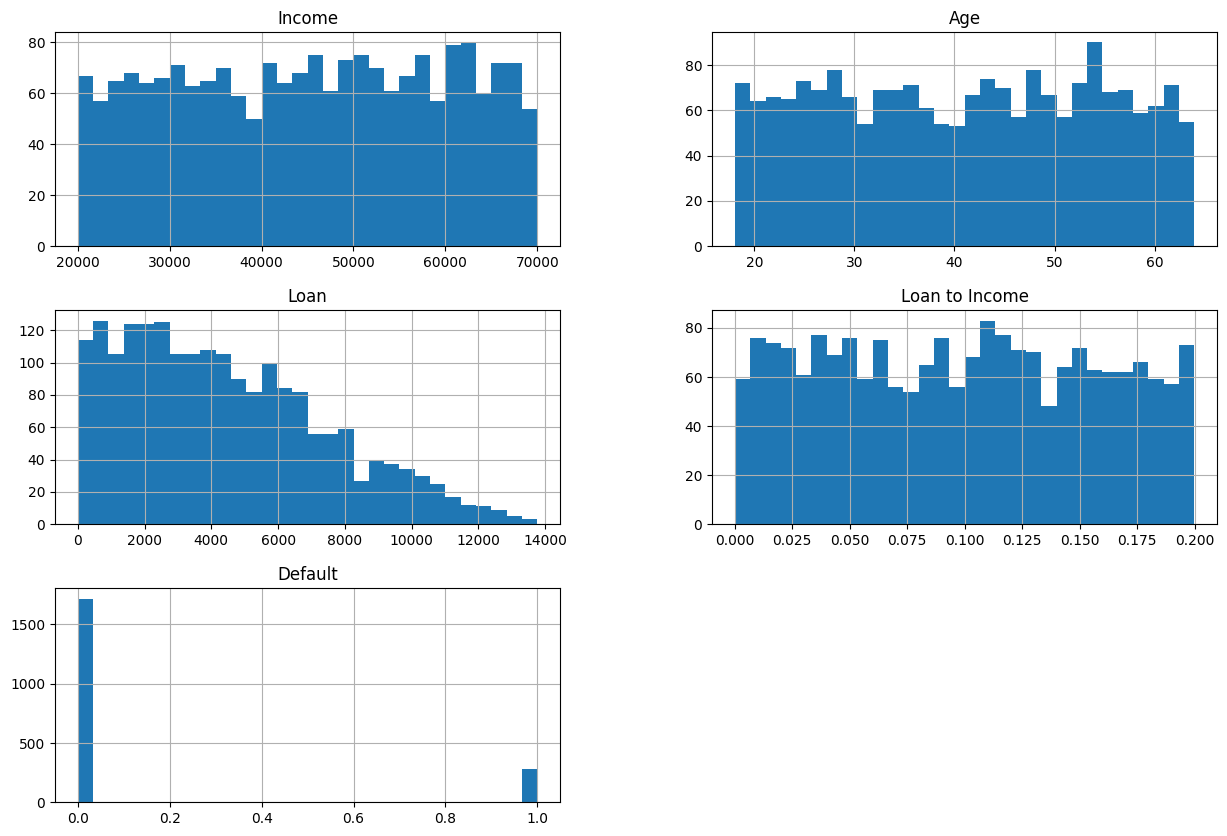

In [12]:
# Гистограммы для признаков
data.hist(bins=30, figsize=(15, 10))
plt.show()
plt.savefig('plots/example_plot.png')  # Сохраняем график в папку plots

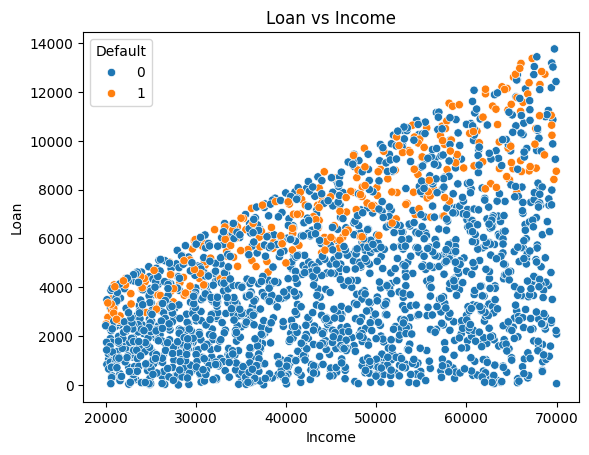

In [13]:
# График рассеяния для Loan vs Income
sns.scatterplot(x='Income', y='Loan', hue='Default', data=data)
plt.title('Loan vs Income')
plt.show()
plt.savefig('plots/example_plot.png')  # Сохраняем график в папку plots

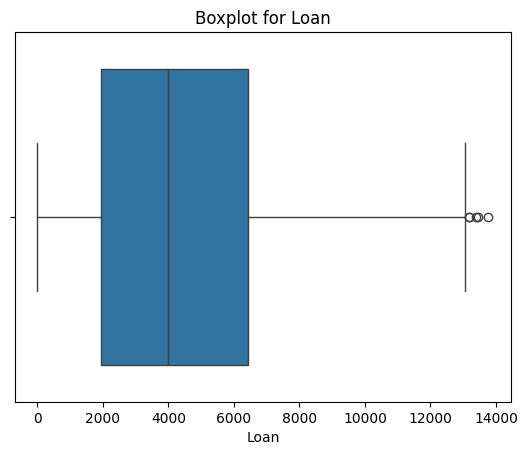

In [15]:
# Ящик с усами для Loan
sns.boxplot(x=data['Loan'])
plt.title('Boxplot for Loan')
plt.show()
plt.savefig('plots/example_plot.png')  # Сохраняем график в папку plots


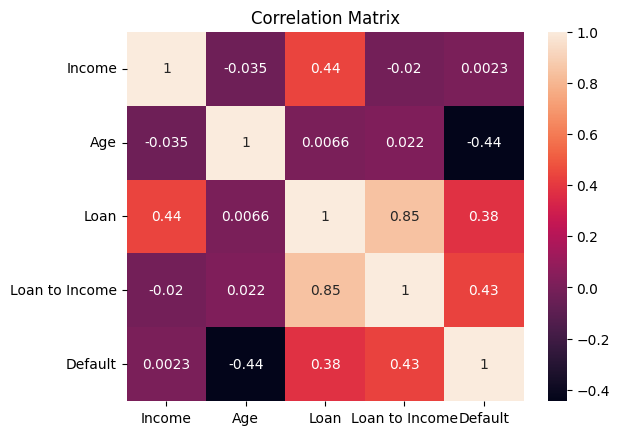

In [16]:
# Корреляционная матрица
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()
plt.savefig('plots/example_plot.png')  # Сохраняем график в папку plots